# Imports

In [1]:
import pandas as pd
import numpy as np

# Tutorial 02 - Read Files and basic operations

Read

In [ ]:
df = pd.read_csv("weather_data_02.csv")
df

List Columns

In [ ]:
df.columns

Numer of columns

In [ ]:
rows, columns = df.shape
columns

Print some rows

In [ ]:
df.head(2)

Print last rows

In [ ]:
df.tail(1)

Print interval

In [ ]:
df[2:5]

In [ ]:
df.day

In [ ]:
df.temperature

In [ ]:
df['event']

In [ ]:
type(df['event'])

In [ ]:
df[['event', 'day','temperature']]

In [ ]:
df['temperature'].min()

In [ ]:
df.describe()

In [ ]:
df[df.temperature>=32]

In [ ]:
df[df.temperature==df['temperature'].max()]

In [ ]:
df.index

In [ ]:
df.set_index('day', inplace = True)

In [ ]:
df.reset_index(inplace = True)
df

In [ ]:
df.set_index('event', inplace=True)
df

In [ ]:
df.loc['Snow']

# Tutorial 03 - Read Excel and create data Frame In Memory

In [ ]:
df = pd.read_csv("weather_data03.csv")
df

In [ ]:
df = pd.read_excel("weather_data03.xlsx", "Sheet1")
df

In [ ]:
weather_data = {
    'day': ['1/1/2017','1/2/2017','1/3/2017'],
    'temperature':[32,35,28],
    'windspeed': [6,7,2],
    'event': ['Rain','Sunny','Snow']
}

In [ ]:
df = pd.DataFrame(weather_data)
df

In [ ]:
weather_data = [
    ('1/1/2017',32,6,'Rain'),
    ('1/2/2017',35,7,'Sunny'),
    ('1/3/2017',28,2,'Snow')
]

In [ ]:
df = pd.DataFrame(weather_data, columns = ["day","temperature","windspeed","event"])
df

In [ ]:
weather_data = [
    {'day':'1/1/2017','temperature':32,'windspeed':6,'event':'Rain'},
    {'day':'1/2/2017','temperature':35,'windspeed':7,'event':'Sunny'},
    {'day':'1/3/2017','temperature':28,'windspeed':2,'event':'Snow'}
]
df = pd.DataFrame(weather_data)

In [ ]:
df

# Tutorial 04 - Writes Files

In [ ]:
df = pd.read_csv("stock_data04.csv", na_values = {
    'eps':["not available", "n.a."],
    'revenue': ["not available", "n.a.", -1],
    'people': ["not available", "n.a."]
})
df

In [ ]:
df.columns

In [ ]:
df.to_csv('new.csv', columns=['tickers', 'eps'])

In [ ]:
def convert_peolpe_cell(cell):
    if cell == "n.a.":
        return 'sam walton'
    return cell

def convert_eps_cell(cell):
    if cell == "not available":
        return None
    return cell

In [ ]:
df = pd.read_excel("stock_data04.xlsx", "Sheet1", converters= {
        'people': convert_peolpe_cell,
        'eps': convert_eps_cell
    })

In [ ]:
df

In [ ]:
df.to_excel("new.xlsx", sheet_name = 'stocks', startrow=1)

In [ ]:
df_stocks = pd.DataFrame({
    'tickers': ['GOOGL', 'WMT', 'MSFT'],
    'price': [845,65,64],
    'pe':[30.37,14.26,30.97],
    'eps': [27.82,4.61,2.12]
})

df_weather = pd.DataFrame({
    'day': ['1/1/2017','1/1/2017','1/1/2017'],
    'temperature': [32,35,28],
    'event': ['Rain', 'Sunny', 'Snow']
})

In [ ]:
with pd.ExcelWriter('stocks_weather.xlsx') as writer:
    df_stocks.to_excel(writer, sheet_name = "stocks")
    df_weather.to_excel(writer, sheet_name = "weather")

# Tutorial 05 - Missing Data

In [ ]:
df = pd.read_csv('weather_data05.csv', parse_dates=["day"])

In [ ]:
type(df.day[0])

In [ ]:
df.set_index('day', inplace=True)

In [ ]:
new_df = df.fillna(0)

In [ ]:
new_df

In [ ]:
new_df = df.fillna({
    'temperature': 0,
    'windspeeed':0,
    'event': 'no event'
})

In [ ]:
new_df

In [ ]:
new_df = df.fillna(method="ffill", limit=1)

In [ ]:
new_df

In [ ]:
new_df = df.interpolate()

In [ ]:
new_df

In [ ]:
new_df = df.dropna(thresh=2)
new_df

In [ ]:
dt = pd.date_range("01-01-2017","01-11-2017")
idx = pd.DatetimeIndex(dt)
df.reindex(idx)

# Tutorial 06 - Handle Missing Data

In [ ]:
df = pd.read_csv('weather_data06.csv')

In [ ]:
new_df = df.replace({
            'temperature': -99999,
            'windspeed': -99999,
            'event': '0'
}, np.NaN)

In [ ]:
df = pd.DataFrame({
    'score': ['exceptional', 'average', 'good', 'poor', 'average', 'exceptional'],
    'student': ['rob', 'maya', 'parthiv', 'tom', 'julia', 'erica']
})

In [ ]:
df.replace(['poor', 'average', 'good', 'exceptional'],[1,2,3,4])

# Tutorial 07 - Group By

In [ ]:
df = pd.read_csv('weather_by_cities07.csv')

# Tutorial 08 - Concat Dataframes

In [ ]:
india_weather = pd.DataFrame({
                              "city":["mumbai", "delhi", "banglore"],
                              "temperature":[32,45,30],
                              "humidity": [80,60,78]
                            })

In [ ]:
india_weather

In [ ]:
us_weather = pd.DataFrame({
                              "city":["new york", "chicago", "orlando"],
                              "temperature":[21,14,35],
                              "humidity": [68,65,75]
                            })

In [ ]:
us_weather

In [ ]:
pd.concat([india_weather, us_weather])

In [ ]:
pd.concat([india_weather, us_weather], ignore_index = True)

In [ ]:
pd.concat([india_weather, us_weather], keys=["india", "us"])

In [ ]:
df=pd.concat([india_weather, us_weather], keys=["india", "us"])
df.loc["us"]

In [ ]:
temperature_df = pd.DataFrame({
    "city":["mumbai", "delhi", "bangalore"],
    "temperature": [32,45,30],
}, index=[0,1,2])

In [ ]:
temperature_df

In [ ]:
windspeed_df = pd.DataFrame({
    "city":["delhi", "mumbai"],
    "temperature": [7,12]
}, index=[1,0])
windspeed_df

In [ ]:
pd.concat([temperature_df, windspeed_df], axis = 1)

In [ ]:
temperature_df

In [ ]:
s = pd.Series(["Humid", "Dry", "Rain"],name="event")

In [ ]:
s

In [ ]:
pd.concat([temperature_df,s], axis=1)

# Tutorial 09 - Merge

In [3]:
df1 = pd.DataFrame({
    "city": ["new york", "chicago", "orlando", "baltimore"],
    "tempertaure": [21,14,35, 32],
})
df1

,city,tempertaure
0,new york,21
1,chicago,14
2,orlando,35
3,baltimore,32


In [4]:
df2 = pd.DataFrame({
    "city":["chicago", "new york", "san francisco"],
    "humidity": [65,68,71], 
})
df2

,city,humidity
0,chicago,65
1,new york,68
2,san francisco,71


In [5]:
df3 = pd.merge(df1, df2, on = "city", how = "outer", indicator=True)

In [6]:
df1 = pd.DataFrame({
    "city": ["new york", "chicago", "orlando", "baltimore"],
    "tempertaure": [21,14,35,32],
    "humidity":[65,68,71,75]
})

In [7]:
df2 = pd.DataFrame({
    "city": ["chicago", "new york", "san diego"],
    "tempertaure": [21,14,35],
    "humidity":[65,68,71]
})

In [8]:
df3 = pd.merge(df1, df2, on="city", suffixes=('_left', '_right'))

# Tutorial 10 - Pivot/Unpivot

In [11]:
df = pd.read_csv('weather10.csv')
df

,date,city,temperature,humidity
0,5/1/2017,new york,65,56
1,5/2/2017,new york,66,58
2,5/3/2017,new york,68,60
3,5/1/2017,mumbai,75,80
4,5/2/2017,mumbai,78,83
5,5/3/2017,mumbai,82,85
6,5/1/2017,beijing,80,26
7,5/2/2017,beijing,77,30
8,5/3/2017,beijing,79,35


In [12]:
df.pivot(index= "date", columns = "city", values = "humidity")

city,beijing,mumbai,new york
date,,,
5/1/2017,26,80,56
5/2/2017,30,83,58
5/3/2017,35,85,60


In [13]:
df.pivot(index = "humidity", columns ="city")

date                     temperature                
city       beijing    mumbai  new york     beijing mumbai new york
humidity                                                          
26        5/1/2017       NaN       NaN        80.0    NaN      NaN
30        5/2/2017       NaN       NaN        77.0    NaN      NaN
35        5/3/2017       NaN       NaN        79.0    NaN      NaN
56             NaN       NaN  5/1/2017         NaN    NaN     65.0
58             NaN       NaN  5/2/2017         NaN    NaN     66.0
60             NaN       NaN  5/3/2017         NaN    NaN     68.0
80             NaN  5/1/2017       NaN         NaN   75.0      NaN
83             NaN  5/2/2017       NaN         NaN   78.0      NaN
85             NaN  5/3/2017       NaN         NaN   82.0      NaN

In [14]:
df = pd.read_csv("weather10-2.csv")
df

,date,city,temperature,humidity
0,5/1/2017,new york,65,56
1,5/1/2017,new york,61,54
2,5/2/2017,new york,70,60
3,5/2/2017,new york,72,62
4,5/1/2017,mumbai,75,80
5,5/1/2017,mumbai,78,83
6,5/2/2017,mumbai,82,85
7,5/2/2017,mumbai,80,26


In [15]:
df.pivot_table(index="city", columns="date", aggfunc="sum", margins=True)

humidity               temperature              
date     5/1/2017 5/2/2017  All    5/1/2017 5/2/2017  All
city                                                     
mumbai        163      111  274         153      162  315
new york      110      122  232         126      142  268
All           273      233  506         279      304  583

In [17]:
df = pd.read_csv("weather10-3.csv")
df

,date,city,temperature,humidity
0,5/1/2017,new york,65,56
1,5/2/2017,new york,61,54
2,5/3/2017,new york,70,60
3,12/1/2017,new york,30,50
4,12/2/2017,new york,28,52
5,12/3/2017,new york,25,51


In [18]:
df['date']=pd.to_datetime(df['date'])

In [19]:
df.pivot_table(index=pd.Grouper(freq = 'M', key ='date'), columns = 'city')

,humidity,temperature
city,new york,new york
date,,
2017-05-31,56.666667,65.333333
2017-12-31,51.000000,27.666667


# Tutorial 11 - Using Melt

In [21]:
df = pd.read_csv('weather11.csv')
df

,day,chicago,chennai,berlin
0,Monday,32,75,41
1,Tuesday,30,77,43
2,Wednesday,28,75,45
3,Thursday,22,82,38
4,Friday,30,83,30
5,Saturday,20,81,45
6,Sunday,25,77,47


In [22]:
df1 = pd.melt(df, id_vars=["day"],var_name="city", value_name="temperature")
df1

,day,city,temperature
0,Monday,chicago,32
1,Tuesday,chicago,30
2,Wednesday,chicago,28
3,Thursday,chicago,22
4,Friday,chicago,30
5,Saturday,chicago,20
6,Sunday,chicago,25
7,Monday,chennai,75
8,Tuesday,chennai,77
9,Wednesday,chennai,75


# Tutorial 12 - Stack/Unstack

In [24]:
df = pd.read_excel("stocks12.xlsx", header=[0,1])
df

Unnamed: 0_level_0    Price                  Price to earnings ratio (P/E)  \
             Company Facebook Google Microsoft                      Facebook   
0         2017-06-05      155    955        66                         37.10   
1         2017-06-06      150    987        69                         36.98   
2         2017-06-07      153    963        62                         36.78   
3         2017-06-08      155   1000        61                         36.11   
4         2017-06-09      156   1012        66                         37.07   

                    
  Google Microsoft  
0   32.0     30.31  
1   31.3     30.56  
2   31.7     30.46  
3   31.2     30.11  
4   30.0     31.00

In [25]:
df_stacked = df.stack(level=0)
df_stacked

Company  Facebook  Google  Microsoft
0 Price                                NaT    155.00   955.0      66.00
  Price to earnings ratio (P/E)        NaT     37.10    32.0      30.31
  Unnamed: 0_level_0            2017-06-05       NaN     NaN        NaN
1 Price                                NaT    150.00   987.0      69.00
  Price to earnings ratio (P/E)        NaT     36.98    31.3      30.56
  Unnamed: 0_level_0            2017-06-06       NaN     NaN        NaN
2 Price                                NaT    153.00   963.0      62.00
  Price to earnings ratio (P/E)        NaT     36.78    31.7      30.46
  Unnamed: 0_level_0            2017-06-07       NaN     NaN        NaN
3 Price                                NaT    155.00  1000.0      61.00
  Price to earnings ratio (P/E)        NaT     36.11    31.2      30.11
  Unnamed: 0_level_0            2017-06-08       NaN     NaN        NaN
4 Price                                NaT    156.00  1012.0      66.00
  Price to earnings ratio (P/E)        NaT     37.07    30.0      31.00
  Unnamed: 0_level_0            2017-06-09       NaN     NaN        NaN

In [26]:
df_stacked.unstack()

Company                                                  Facebook  \
    Price Price to earnings ratio (P/E) Unnamed: 0_level_0    Price   
0     NaT                           NaT         2017-06-05    155.0   
1     NaT                           NaT         2017-06-06    150.0   
2     NaT                           NaT         2017-06-07    153.0   
3     NaT                           NaT         2017-06-08    155.0   
4     NaT                           NaT         2017-06-09    156.0   

                                                    Google  \
  Price to earnings ratio (P/E) Unnamed: 0_level_0   Price   
0                         37.10                NaN   955.0   
1                         36.98                NaN   987.0   
2                         36.78                NaN   963.0   
3                         36.11                NaN  1000.0   
4                         37.07                NaN  1012.0   

                                                   Microsoft  \
  Price to earnings ratio (P/E) Unnamed: 0_level_0     Price   
0                          32.0                NaN      66.0   
1                          31.3                NaN      69.0   
2                          31.7                NaN      62.0   
3                          31.2                NaN      61.0   
4                          30.0                NaN      66.0   

                                                    
  Price to earnings ratio (P/E) Unnamed: 0_level_0  
0                         30.31                NaN  
1                         30.56                NaN  
2                         30.46                NaN  
3                         30.11                NaN  
4                         31.00                NaN

In [27]:
df2 = pd.read_excel("stocks_3_levels12.xlsx", header = [0,1,2])
df2

Unnamed: 0_level_0 Price Ratios                   \
  Unnamed: 0_level_1        Price                    
             Company     Facebook Google Microsoft   
0            Q1 2016          155    955        66   
1            Q2 2016          150    987        69   
2            Q3 2016          153    963        62   
3            Q4 2016          155   1000        61   
4            Q1 2017          156   1012        66   

                                                 Income Statement         \
  Price to earnings ratio (P/E)                         Net Sales          
                       Facebook Google Microsoft         Facebook Google   
0                         37.10   32.0     30.31              2.6     20   
1                         36.98   31.3     30.56              3.1     22   
2                         36.78   31.7     30.46              4.3     24   
3                         36.11   31.2     30.11              6.7     26   
4                         37.07   30.0     31.00              8.1     31   

                                         
            Net Profit                   
  Microsoft   Facebook Google Microsoft  
0     18.70       0.80   5.43      4.56  
1     21.30       0.97   5.89      5.10  
2     21.45       1.20   6.10      5.43  
3     21.88       1.67   6.50      5.89  
4     22.34       2.03   6.40      6.09

In [28]:
df2.stack(level=0)

Net Profit                  Net Sales                   \
                       Facebook Google Microsoft  Facebook Google Microsoft   
0 Income Statement         0.80   5.43      4.56       2.6   20.0     18.70   
  Price Ratios              NaN    NaN       NaN       NaN    NaN       NaN   
  Unnamed: 0_level_0        NaN    NaN       NaN       NaN    NaN       NaN   
1 Income Statement         0.97   5.89      5.10       3.1   22.0     21.30   
  Price Ratios              NaN    NaN       NaN       NaN    NaN       NaN   
  Unnamed: 0_level_0        NaN    NaN       NaN       NaN    NaN       NaN   
2 Income Statement         1.20   6.10      5.43       4.3   24.0     21.45   
  Price Ratios              NaN    NaN       NaN       NaN    NaN       NaN   
  Unnamed: 0_level_0        NaN    NaN       NaN       NaN    NaN       NaN   
3 Income Statement         1.67   6.50      5.89       6.7   26.0     21.88   
  Price Ratios              NaN    NaN       NaN       NaN    NaN       NaN   
  Unnamed: 0_level_0        NaN    NaN       NaN       NaN    NaN       NaN   
4 Income Statement         2.03   6.40      6.09       8.1   31.0     22.34   
  Price Ratios              NaN    NaN       NaN       NaN    NaN       NaN   
  Unnamed: 0_level_0        NaN    NaN       NaN       NaN    NaN       NaN   

                        Price                   Price to earnings ratio (P/E)  \
                     Facebook  Google Microsoft                      Facebook   
0 Income Statement        NaN     NaN       NaN                           NaN   
  Price Ratios          155.0   955.0      66.0                         37.10   
  Unnamed: 0_level_0      NaN     NaN       NaN                           NaN   
1 Income Statement        NaN     NaN       NaN                           NaN   
  Price Ratios          150.0   987.0      69.0                         36.98   
  Unnamed: 0_level_0      NaN     NaN       NaN                           NaN   
2 Income Statement        NaN     NaN       NaN                           NaN   
  Price Ratios          153.0   963.0      62.0                         36.78   
  Unnamed: 0_level_0      NaN     NaN       NaN                           NaN   
3 Income Statement        NaN     NaN       NaN                           NaN   
  Price Ratios          155.0  1000.0      61.0                         36.11   
  Unnamed: 0_level_0      NaN     NaN       NaN                           NaN   
4 Income Statement        NaN     NaN       NaN                           NaN   
  Price Ratios          156.0  1012.0      66.0                         37.07   
  Unnamed: 0_level_0      NaN     NaN       NaN                           NaN   

                                      Unnamed: 0_level_1  
                     Google Microsoft            Company  
0 Income Statement      NaN       NaN                NaN  
  Price Ratios         32.0     30.31                NaN  
  Unnamed: 0_level_0    NaN       NaN            Q1 2016  
1 Income Statement      NaN       NaN                NaN  
  Price Ratios         31.3     30.56                NaN  
  Unnamed: 0_level_0    NaN       NaN            Q2 2016  
2 Income Statement      NaN       NaN                NaN  
  Price Ratios         31.7     30.46                NaN  
  Unnamed: 0_level_0    NaN       NaN            Q3 2016  
3 Income Statement      NaN       NaN                NaN  
  Price Ratios         31.2     30.11                NaN  
  Unnamed: 0_level_0    NaN       NaN            Q4 2016  
4 Income Statement      NaN       NaN                NaN  
  Price Ratios         30.0     31.00                NaN  
  Unnamed: 0_level_0    NaN       NaN            Q1 2017

# Tutorial 13 - Crosstab

In [30]:
df = pd.read_excel("survey13.xls")
df

,Name,Nationality,Sex,Age,Handedness
0,Kathy,USA,Female,23,Right
1,Linda,USA,Female,18,Right
2,Peter,USA,Male,19,Right
3,John,USA,Male,22,Left
4,Fatima,Bangadesh,Female,31,Left
5,Kadir,Bangadesh,Male,25,Left
6,Dhaval,India,Male,35,Left
7,Sudhir,India,Male,31,Left
8,Parvir,India,Male,37,Right
9,Yan,China,Female,52,Right


In [31]:
pd.crosstab([df.Sex, df.Nationality],df.Handedness, margins=True)

Handedness          Left  Right  All
Sex    Nationality                  
Female Bangadesh       1      0    1
       China           1      1    2
       USA             0      2    2
Male   Bangadesh       1      0    1
       China           1      0    1
       India           2      1    3
       USA             1      1    2
All                    7      5   12

In [32]:
pd.crosstab([df.Sex],df.Handedness, margins = True)

Handedness,Left,Right,All
Sex,,,
Female,2,3,5
Male,5,2,7
All,7,5,12


In [33]:
pd.crosstab([df.Sex],df.Handedness, normalize='index')

Handedness,Left,Right
Sex,,
Female,0.400000,0.600000
Male,0.714286,0.285714


In [34]:
pd.crosstab([df.Sex],df.Handedness, values = df.Age, aggfunc = np.average)

Handedness,Left,Right
Sex,,
Female,44.5,31.0
Male,31.2,28.0


# Tutorial 14 - Datetime Index

In [35]:
df = pd.read_csv("aapl.csv")
df.head(5)

,Date,Open,High,Low,Close,Volume
0,7-Jul-17,142.90,144.75,142.90,144.18,19201712
1,6-Jul-17,143.02,143.50,142.41,142.73,24128782
2,5-Jul-17,143.69,144.79,142.72,144.09,21569557
3,3-Jul-17,144.88,145.30,143.10,143.50,14277848
4,30-Jun-17,144.45,144.96,143.78,144.02,23024107


In [36]:
type(df.Date[0])

str

In [37]:
df = pd.read_csv("aapl.csv", parse_dates=["Date"])

In [38]:
df.head(5)

,Date,Open,High,Low,Close,Volume
0,2017-07-07,142.90,144.75,142.90,144.18,19201712
1,2017-07-06,143.02,143.50,142.41,142.73,24128782
2,2017-07-05,143.69,144.79,142.72,144.09,21569557
3,2017-07-03,144.88,145.30,143.10,143.50,14277848
4,2017-06-30,144.45,144.96,143.78,144.02,23024107


In [39]:
type(df.Date[0])

pandas._libs.tslibs.timestamps.Timestamp

In [40]:
df = pd.read_csv("aapl.csv", parse_dates=["Date"], index_col = "Date")

In [41]:
df.index

DatetimeIndex(['2017-07-07', '2017-07-06', '2017-07-05', '2017-07-03',
               '2017-06-30', '2017-06-29', '2017-06-28', '2017-06-27',
               '2017-06-26', '2017-06-23',
               ...
               '2016-07-22', '2016-07-21', '2016-07-20', '2016-07-19',
               '2016-07-18', '2016-07-15', '2016-07-14', '2016-07-13',
               '2016-07-12', '2016-07-11'],
              dtype='datetime64[ns]', name='Date', length=251, freq=None)

In [42]:
df["2017-01-07":"2017-01-01"]

,Open,High,Low,Close,Volume
Date,,,,,
2017-01-06,116.78,118.16,116.47,117.91,31751900
2017-01-05,115.92,116.86,115.81,116.61,22193587
2017-01-04,115.85,116.51,115.75,116.02,21118116
2017-01-03,115.80,116.33,114.76,116.15,28781865


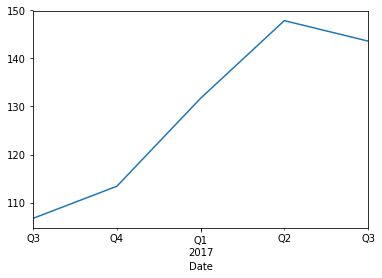

In [43]:
%matplotlib inline
df.Close.resample('Q').mean().plot()

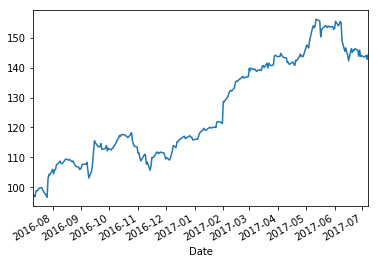

In [44]:
df.Close.plot()

# Tutorial 15 - Data Range

In [45]:
df = pd.read_csv("aapl_no_dates15.csv")
df.head()

,Open,High,Low,Close,Volume
0,153.17,153.33,152.22,153.18,16404088
1,153.58,155.45,152.89,155.45,27770715
2,154.34,154.45,153.46,153.93,25331662
3,153.90,155.81,153.78,154.45,26624926
4,155.02,155.98,154.48,155.37,21069647


In [46]:
rng = pd.date_range(start="6/1/2017", end ="6/30/2017", freq='B')

In [48]:
df.set_index(rng, inplace=True)
df

,Open,High,Low,Close,Volume
2017-06-01,153.17,153.33,152.22,153.18,16404088
2017-06-02,153.58,155.45,152.89,155.45,27770715
2017-06-05,154.34,154.45,153.46,153.93,25331662
2017-06-06,153.90,155.81,153.78,154.45,26624926
2017-06-07,155.02,155.98,154.48,155.37,21069647
2017-06-08,155.25,155.54,154.40,154.99,21250798
2017-06-09,155.19,155.19,146.02,148.98,64882657
2017-06-12,145.74,146.09,142.51,145.42,72307330
2017-06-13,147.16,147.45,145.15,146.59,34165445
2017-06-14,147.50,147.50,143.84,145.16,31531232


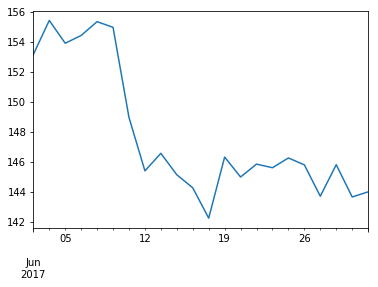

In [49]:
%matplotlib inline
df.Close.plot()

In [50]:
df["2017-06-01":"2017-06-10"].Close.mean()

153.7642857142857

In [51]:
df.asfreq('D',method='pad')

,Open,High,Low,Close,Volume
2017-06-01,153.17,153.33,152.22,153.18,16404088
2017-06-02,153.58,155.45,152.89,155.45,27770715
2017-06-03,153.58,155.45,152.89,155.45,27770715
2017-06-04,153.58,155.45,152.89,155.45,27770715
2017-06-05,154.34,154.45,153.46,153.93,25331662
2017-06-06,153.90,155.81,153.78,154.45,26624926
2017-06-07,155.02,155.98,154.48,155.37,21069647
2017-06-08,155.25,155.54,154.40,154.99,21250798
2017-06-09,155.19,155.19,146.02,148.98,64882657
2017-06-10,155.19,155.19,146.02,148.98,64882657


In [52]:
df.asfreq('H',method='pad')

,Open,High,Low,Close,Volume
2017-06-01 00:00:00,153.17,153.33,152.22,153.18,16404088
2017-06-01 01:00:00,153.17,153.33,152.22,153.18,16404088
2017-06-01 02:00:00,153.17,153.33,152.22,153.18,16404088
2017-06-01 03:00:00,153.17,153.33,152.22,153.18,16404088
2017-06-01 04:00:00,153.17,153.33,152.22,153.18,16404088
2017-06-01 05:00:00,153.17,153.33,152.22,153.18,16404088
2017-06-01 06:00:00,153.17,153.33,152.22,153.18,16404088
2017-06-01 07:00:00,153.17,153.33,152.22,153.18,16404088
2017-06-01 08:00:00,153.17,153.33,152.22,153.18,16404088
2017-06-01 09:00:00,153.17,153.33,152.22,153.18,16404088


In [53]:
rng = pd.date_range(start="1/1/2017",periods=72,freq="B")
rng

DatetimeIndex(['2017-01-02', '2017-01-03', '2017-01-04', '2017-01-05',
               '2017-01-06', '2017-01-09', '2017-01-10', '2017-01-11',
               '2017-01-12', '2017-01-13', '2017-01-16', '2017-01-17',
               '2017-01-18', '2017-01-19', '2017-01-20', '2017-01-23',
               '2017-01-24', '2017-01-25', '2017-01-26', '2017-01-27',
               '2017-01-30', '2017-01-31', '2017-02-01', '2017-02-02',
               '2017-02-03', '2017-02-06', '2017-02-07', '2017-02-08',
               '2017-02-09', '2017-02-10', '2017-02-13', '2017-02-14',
               '2017-02-15', '2017-02-16', '2017-02-17', '2017-02-20',
               '2017-02-21', '2017-02-22', '2017-02-23', '2017-02-24',
               '2017-02-27', '2017-02-28', '2017-03-01', '2017-03-02',
               '2017-03-03', '2017-03-06', '2017-03-07', '2017-03-08',
               '2017-03-09', '2017-03-10', '2017-03-13', '2017-03-14',
               '2017-03-15', '2017-03-16', '2017-03-17', '2017-03-20',
      

In [55]:
ts = pd.Series(np.random.randint(1,10,len(rng)), index=rng)
ts.head(10)

2017-01-02    5
2017-01-03    2
2017-01-04    1
2017-01-05    7
2017-01-06    6
2017-01-09    4
2017-01-10    5
2017-01-11    4
2017-01-12    8
2017-01-13    5
Freq: B, dtype: int32

# Tutorial 16 - Holiday

# Tutorial 17 - To Holiday

# Tutorial 18 - Time Period

# Tutorial 19 - TImezone

# Tutorial 20 - Shifting Lagging